In [1]:
data_housing <- read.csv("housing.csv")

In [ ]:
plot(data_housing)

In [2]:
str(data_housing)

'data.frame':	1460 obs. of  25 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ OverallQual  : int  7 6 7 7 8 5 8 7 7 5 ...
 $ OverallCond  : int  5 8 5 5 5 5 5 6 5 6 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : int  196 0 162 0 350 0 186 240 0 0 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ X1stFlrSF    : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ X2ndFlrSF    : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ BedroomAbvGr : int  3 3 3 3 4 1 3 3 2 2 ...
 $ KitchenAbvGr : int  1 1 1 1 1 1 1 1 2 2 ...
 $ TotRmsAbvGrd : int  8 6 6 7 9 5 7 7 8 5 ...
 $ GarageArea   : int  548 460 6

In [3]:
summary(data_housing)

   MSSubClass     LotFrontage        LotArea        OverallQual    
 Min.   : 20.0   Min.   : 21.00   Min.   :  1300   Min.   : 1.000  
 1st Qu.: 20.0   1st Qu.: 59.00   1st Qu.:  7554   1st Qu.: 5.000  
 Median : 50.0   Median : 69.00   Median :  9478   Median : 6.000  
 Mean   : 56.9   Mean   : 70.05   Mean   : 10517   Mean   : 6.099  
 3rd Qu.: 70.0   3rd Qu.: 80.00   3rd Qu.: 11602   3rd Qu.: 7.000  
 Max.   :190.0   Max.   :313.00   Max.   :215245   Max.   :10.000  
                 NA's   :259                                       
  OverallCond      YearBuilt     YearRemodAdd    MasVnrArea    
 Min.   :1.000   Min.   :1872   Min.   :1950   Min.   :   0.0  
 1st Qu.:5.000   1st Qu.:1954   1st Qu.:1967   1st Qu.:   0.0  
 Median :5.000   Median :1973   Median :1994   Median :   0.0  
 Mean   :5.575   Mean   :1971   Mean   :1985   Mean   : 103.7  
 3rd Qu.:6.000   3rd Qu.:2000   3rd Qu.:2004   3rd Qu.: 166.0  
 Max.   :9.000   Max.   :2010   Max.   :2010   Max.   :1600.0  
        

### Add Missing Value

In [4]:
colSums(is.na(data_housing))

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond 
            0           259             0             0             0 
    YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF     X1stFlrSF 
            0             0             8             0             0 
    X2ndFlrSF     GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
            0             0             0             0             0 
   GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        MoSold        YrSold     SalePrice 
            0             0             0             0             0

In [5]:
data_housing$LotFrontage[is.na(data_housing$LotFrontage)] <- median(data_housing$LotFrontage, na.rm=TRUE)
data_housing$MasVnrArea[is.na(data_housing$MasVnrArea)] <- median(data_housing$MasVnrArea, na.rm=TRUE)

In [6]:
colSums(is.na(data_housing))

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond 
            0             0             0             0             0 
    YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF     X1stFlrSF 
            0             0             0             0             0 
    X2ndFlrSF     GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
            0             0             0             0             0 
   GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        MoSold        YrSold     SalePrice 
            0             0             0             0             0

### Linear Regression

In [7]:
model <- lm(SalePrice ~ ., data = data_housing)
summary(model)


Call:
lm(formula = SalePrice ~ ., data = data_housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-487766  -17669   -2084   13743  314772 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.669e+02  1.439e+06   0.000 0.999797    
MSSubClass    -1.477e+02  2.800e+01  -5.276 1.52e-07 ***
LotFrontage   -4.678e+01  5.269e+01  -0.888 0.374729    
LotArea        5.439e-01  1.025e-01   5.305 1.30e-07 ***
OverallQual    1.754e+04  1.179e+03  14.877  < 2e-16 ***
OverallCond    4.762e+03  1.027e+03   4.636 3.88e-06 ***
YearBuilt      4.023e+02  5.682e+01   7.081 2.24e-12 ***
YearRemodAdd   1.617e+02  6.573e+01   2.460 0.014027 *  
MasVnrArea     3.231e+01  6.012e+00   5.374 8.98e-08 ***
TotalBsmtSF    1.460e+01  4.083e+00   3.577 0.000359 ***
X1stFlrSF      3.067e+01  2.049e+01   1.497 0.134675    
X2ndFlrSF      2.570e+01  2.011e+01   1.278 0.201454    
GrLivArea      2.453e+01  2.015e+01   1.218 0.223490    
BedroomAbvGr  -1.139e+04  1.695e+03  

### Bootstrap

Panggil Library "boot", jika belum diinstall : install.packages("boot")

In [8]:
library(boot)

Buat function untuk membuat bootstrap linear regression

In [9]:
coef.reg <- function(formula, data, indices) {
    d <- data[indices,] 
    fit <- lm(formula, data = d)
    return(fit$coefficients)
    } 

In [38]:
# bootstrapping with 1000 replications 
set.seed(1)
results <- boot(data = data_housing, statistic = coef.reg, R = 10000,
                formula = SalePrice ~ .)


In [39]:
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_housing, statistic = coef.reg, R = 10000, formula = SalePrice ~ 
    .)


Bootstrap Statistics :
          original        bias     std. error
t1*  -3.669446e+02 -6.579331e+04 1.339935e+06
t2*  -1.477374e+02  1.090957e+01 4.872512e+01
t3*  -4.678076e+01  3.048719e+01 1.426135e+02
t4*   5.438857e-01  1.041789e-02 1.387090e-01
t5*   1.754043e+04 -5.808051e+02 2.265311e+03
t6*   4.762316e+03  8.116130e+01 9.774333e+02
t7*   4.023074e+02 -2.443006e+00 4.938785e+01
t8*   1.616569e+02  1.306040e+00 5.159523e+01
t9*   3.230633e+01  3.476128e-01 9.880193e+00
t10*  1.460331e+01  2.754355e+00 1.160668e+01
t11*  3.067061e+01  1.712422e+00 2.607269e+01
t12*  2.569796e+01  2.732176e+00 2.729735e+01
t13*  2.453400e+01 -1.708823e+00 2.411870e+01
t14* -1.138995e+04 -4.051704e+02 2.795695e+03
t15* -1.287034e+04 -6.951243e+02 5.471294e+03
t16*  5.104334e+03 -3.249792e+01 2.236885e+03
t17*  2.990451e+01 -1.965368e-01 6.618433e+00
t18*  3.253608e+

In [15]:
str(results)

List of 11
 $ t0       : Named num [1:25] -366.945 -147.737 -46.781 0.544 17540.428 ...
  ..- attr(*, "names")= chr [1:25] "(Intercept)" "MSSubClass" "LotFrontage" "LotArea" ...
 $ t        : num [1:1000, 1:25] -732921 2271173 -1051058 1385071 791711 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:25] "(Intercept)" "MSSubClass" "LotFrontage" "LotArea" ...
 $ R        : num 1000
 $ data     :'data.frame':	1460 obs. of  25 variables:
  ..$ MSSubClass   : int [1:1460] 60 20 60 70 60 50 20 60 50 190 ...
  ..$ LotFrontage  : int [1:1460] 65 80 68 60 84 85 75 69 51 50 ...
  ..$ LotArea      : int [1:1460] 8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
  ..$ OverallQual  : int [1:1460] 7 6 7 7 8 5 8 7 7 5 ...
  ..$ OverallCond  : int [1:1460] 5 8 5 5 5 5 5 6 5 6 ...
  ..$ YearBuilt    : int [1:1460] 2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
  ..$ YearRemodAdd : int [1:1460] 2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
  ..$ MasVnrArea

In [46]:
str(results$t)

 num [1:10000, 1:25] -604850 -2173 736061 1398255 958219 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:25] "(Intercept)" "MSSubClass" "LotFrontage" "LotArea" ...


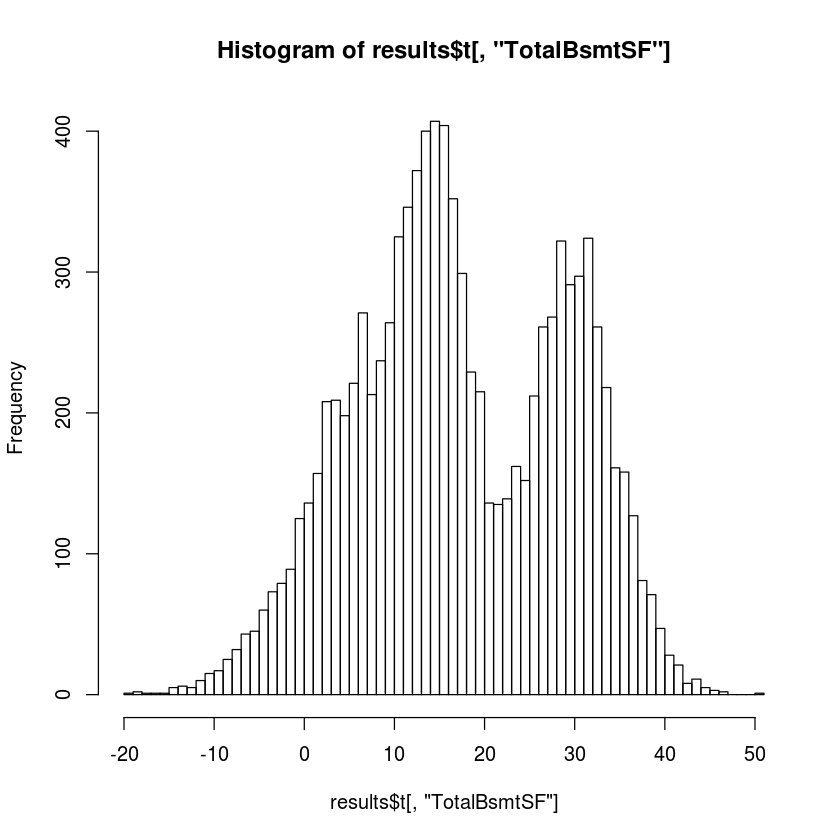

In [47]:
hist(results$t[, "TotalBsmtSF"],50)

In [60]:
results$t

(Intercept),MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,⋯,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
-604850.156,-96.51409,180.15647,0.5181614,15428.71,5054.622,378.4394,156.03875,21.61280,28.927858,⋯,5338.7171,23.79285,17.26573,-10.9965461,-6.0116630,-31.407097,53.41256,183.284067,221.93120,-255.74699
-2173.365,-141.61587,55.57816,0.4617227,17667.08,5447.683,383.7860,99.45117,41.00796,20.763713,⋯,4793.2374,23.75340,29.40674,21.1480926,9.5429672,14.357612,21.03552,5.692391,20.76370,-510.81498
736061.127,-169.92972,-78.68744,0.5464725,17085.57,4910.590,445.0768,139.86681,32.16931,16.136727,⋯,4662.6680,29.75341,34.84886,16.1020610,15.1646958,132.916135,92.47730,3.017761,-36.42182,-962.51409
1398254.540,-166.01876,-14.09446,0.5750591,18288.67,5256.005,458.1669,146.82835,22.56923,10.703400,⋯,4505.0205,25.67865,27.57647,-0.9960887,1.5209379,26.272986,26.80787,40.373993,227.16756,-1320.97480
958219.060,-91.57372,149.29230,0.5137747,16014.48,6471.989,404.5096,153.04605,32.19478,26.536748,⋯,5120.6015,36.57345,36.24129,-24.7706513,10.6778161,-16.454610,68.55349,48.451191,-924.61020,-1058.45644
1537933.316,-82.68261,267.19039,0.5365273,16658.62,5244.829,398.1661,126.84878,27.21864,28.836222,⋯,2100.2012,23.05022,39.11925,-1.3730363,17.1396586,-36.060076,91.31836,186.570632,-698.38055,-1318.00373
-1271729.906,-158.80285,-23.65949,0.6286419,20507.29,1824.502,308.0768,254.02515,24.90594,12.372374,⋯,7663.1782,37.97866,40.74173,-14.7774496,17.4110785,13.010882,87.48198,62.995843,-89.47733,56.42096
-1044117.129,-154.21527,-61.23149,0.7376707,14440.88,5698.549,431.8651,94.26902,45.77574,15.002547,⋯,4595.1956,26.87615,24.12947,-10.1981998,8.6156846,-17.264801,42.12834,-78.204919,83.68044,-21.31053
-1076745.109,-176.64193,-213.01802,0.6804574,17018.37,4499.834,387.1936,217.01897,35.48571,2.579813,⋯,4382.6726,29.93921,53.14875,44.8763940,40.6898584,61.149732,66.14740,-196.913660,589.08070,-78.48413
-3241717.311,-144.17985,-142.81926,0.6342169,16993.46,4803.395,367.7229,214.06801,34.19077,15.655079,⋯,6206.3976,34.62427,32.01145,0.7556314,22.9414206,21.986210,72.40691,55.786011,285.22282,1014.46593


In [45]:
colnames(results$t) <- names(results$t0)

* Bootstrap Estimates of Regression Coefficient

In [21]:
coef_MSSubClass <- mean(results$t[, "MSSubClass"])
coef_MSSubClass

[1] -134.4952

In [22]:
coef_TotalBsmtSF <- mean(results$t[, "TotalBsmtSF"])
coef_TotalBsmtSF

[1] 17.85416

In [23]:
coef_GrLivArea <- mean(results$t[, "GrLivArea"])
coef_GrLivArea

[1] 23.48984

In [24]:
coef_PoolArea <- mean(results$t[, "PoolArea"], na.rm=TRUE)
coef_PoolArea

[1] -26.88711

In [25]:
coef_YrSold <- mean(results$t[, "YrSold"], na.rm=TRUE)
coef_YrSold

[1] -530.6637

* Booststrap Estimates of Standard Errors

In [48]:
se_MSSubClass <- sd(results$t[, "MSSubClass"])
se_MSSubClass

[1] 48.72512

In [49]:
se_TotalBsmtSF <- sd(results$t[, "TotalBsmtSF"])
se_TotalBsmtSF

[1] 11.60668

In [50]:
se_GrLivArea <- sd(results$t[, "GrLivArea"])
se_GrLivArea

[1] 24.1187

In [29]:
se_PoolArea <- sd(results$t[, "PoolArea"], na.rm=TRUE)
se_PoolArea

[1] 144.1955

In [30]:
se_YrSold <- sd(results$t[, "YrSold"], na.rm=TRUE)
se_YrSold

[1] 656.6741

* Bootstrap Estimates of Bias

In [31]:
bias_MSSubClass <- results$t0["MSSubClass"] - coef_MSSubClass
bias_MSSubClass

MSSubClass 
 -13.24215

In [32]:
bias_TotalBsmtSF <- results$t0["TotalBsmtSF"] - coef_TotalBsmtSF
bias_TotalBsmtSF

TotalBsmtSF 
  -3.250841

In [33]:
bias_GrLivArea <- results$t0["GrLivArea"] - coef_GrLivArea
bias_GrLivArea

GrLivArea 
 1.044164

In [34]:
bias_PoolArea <- results$t0["PoolArea"] - coef_PoolArea
bias_PoolArea

PoolArea 
0.380641

In [35]:
bias_YrSold <- results$t0["YrSold"] - coef_YrSold
bias_YrSold

YrSold 
-50.12399

### Hypothesis Testing with Bootstrap

In [28]:
library(ggplot2)

CI 95%

In [51]:
quantile(results$t[, "MSSubClass"], probs = c(0.05, 0.95))

5%        95% 
-217.65220  -62.08674

In [64]:
quantile(results$t[, "TotalBsmtSF"], probs = c(0.05, 0.95))

5%       95% 
-1.057898 35.363699

In [55]:
boot_ci <- boot.ci(results, type="perc", conf=0.95, index = 10)

In [73]:
boot_ci

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, conf = 0.95, type = "perc", index = 10)

Intervals : 
Level     Percentile     
95%   (-4.32, 37.33 )  
Calculations and Intervals on Original Scale

In [61]:
?boot.ci

### Cross Validation

In [74]:
?cv.glm

In [75]:
housing.glm <- glm(SalePrice ~ ., data = data_housing)
(cv.err <- cv.glm(data_housing, housing.glm, K = 10)$delta[1])

[1] 1394595883

In [76]:
?glm

### Variable Selection

In [77]:
library(leaps)

* Best Subset

In [96]:
help(regsubsets)

In [79]:
regfit.full = regsubsets(SalePrice ~ ., data = data_housing, nvmax =25)
regfit.summary <- summary(regfit.full)

In [80]:
cbind(seq(1:24), regfit.summary$rsq)

1,0.6256519
2,0.7141732
3,0.7420670
4,0.7578568
5,0.7668618
6,0.7742486
7,0.7805154
8,0.7858391
9,0.7903055
10,0.7942472
11,0.7963112


In [81]:
cbind(seq(1:24), regfit.summary$adjr2)

1,0.6253951
2,0.7137809
3,0.7415355
4,0.7571912
5,0.7660601
6,0.7733164
7,0.7794573
8,0.7846584
9,0.7890039
10,0.7928272
11,0.7947639


In [82]:
cbind(seq(1:24), regfit.summary$cp)

1,1262.78369
2,621.87848
3,421.29418
4,308.61684
5,245.21618
6,193.56810
7,150.05418
8,113.38952
9,82.95174
10,56.32414
11,43.33362


In [83]:
cbind(seq(1:24), regfit.summary$bic)

1,-1419.979
2,-1806.601
3,-1949.236
4,-2034.179
5,-2082.224
6,-2121.945
7,-2155.761
8,-2184.325
9,-2207.809
10,-2228.228
11,-2235.662


* Forward Selection

In [84]:
regfit.fwd = regsubsets(SalePrice ~ ., data = data_housing, method = "forward", nvmax =26)
regfitfwd.summary <- summary(regfit.fwd)

In [85]:
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data_housing, method = "forward", 
    nvmax = 26)
24 Variables  (and intercept)
              Forced in Forced out
MSSubClass        FALSE      FALSE
LotFrontage       FALSE      FALSE
LotArea           FALSE      FALSE
OverallQual       FALSE      FALSE
OverallCond       FALSE      FALSE
YearBuilt         FALSE      FALSE
YearRemodAdd      FALSE      FALSE
MasVnrArea        FALSE      FALSE
TotalBsmtSF       FALSE      FALSE
X1stFlrSF         FALSE      FALSE
X2ndFlrSF         FALSE      FALSE
GrLivArea         FALSE      FALSE
BedroomAbvGr      FALSE      FALSE
KitchenAbvGr      FALSE      FALSE
TotRmsAbvGrd      FALSE      FALSE
GarageArea        FALSE      FALSE
WoodDeckSF        FALSE      FALSE
OpenPorchSF       FALSE      FALSE
EnclosedPorch     FALSE      FALSE
X3SsnPorch        FALSE      FALSE
ScreenPorch       FALSE      FALSE
PoolArea          FALSE      FALSE
MoSold            FALSE      FALSE
YrSold  

* Backward Selection

In [86]:
regfit.bcd = regsubsets(SalePrice ~ ., data = data_housing, method = "backward", nvmax =26)
regfitbcd.summary <- summary(regfit.bcd)

In [87]:
summary(regfit.bcd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data_housing, method = "backward", 
    nvmax = 26)
24 Variables  (and intercept)
              Forced in Forced out
MSSubClass        FALSE      FALSE
LotFrontage       FALSE      FALSE
LotArea           FALSE      FALSE
OverallQual       FALSE      FALSE
OverallCond       FALSE      FALSE
YearBuilt         FALSE      FALSE
YearRemodAdd      FALSE      FALSE
MasVnrArea        FALSE      FALSE
TotalBsmtSF       FALSE      FALSE
X1stFlrSF         FALSE      FALSE
X2ndFlrSF         FALSE      FALSE
GrLivArea         FALSE      FALSE
BedroomAbvGr      FALSE      FALSE
KitchenAbvGr      FALSE      FALSE
TotRmsAbvGrd      FALSE      FALSE
GarageArea        FALSE      FALSE
WoodDeckSF        FALSE      FALSE
OpenPorchSF       FALSE      FALSE
EnclosedPorch     FALSE      FALSE
X3SsnPorch        FALSE      FALSE
ScreenPorch       FALSE      FALSE
PoolArea          FALSE      FALSE
MoSold            FALSE      FALSE
YrSold 

* Validation Set Evaluation

In [88]:
set.seed(1)

In [89]:
train = sample(c(TRUE, FALSE), nrow(data_housing), rep = TRUE)
test = (!train)

In [90]:
regfit.best = regsubsets(SalePrice ~ ., data = data_housing[train,], nvmax =24)

In [91]:
test.mat = model.matrix (SalePrice ~ ., data = data_housing[test ,])

In [93]:
val.error = rep(NA, 24)
for(i in 1:24){
    coefi = coef(regfit.best, id = i)
    pred = test.mat[, names(coefi)] %*% coefi
    val.error[i] = mean((data_housing$SalePrice[test] - pred)^2)
}

In [94]:
which.min(val.error)

[1] 16

In [95]:
coef(regfit.best, 19)

(Intercept)    MSSubClass   LotFrontage       LotArea   OverallQual 
 26771.021801   -202.815602   -121.844616      0.217283  20179.035964 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF 
  3266.641700    422.690790    183.063281     19.195901      7.530768 
    X2ndFlrSF     GrLivArea  BedroomAbvGr  TotRmsAbvGrd    GarageArea 
    -7.313342     51.366162  -8290.746578   3871.998288     30.832695 
   WoodDeckSF EnclosedPorch    X3SsnPorch   ScreenPorch        YrSold 
    46.330292     37.506451     49.961219     87.038216   -634.407022

* k-fold Cross Validation

In [173]:
predict.regsubset = function(object, newdata, id){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvar = names(coefi)
    mat[, xvar] %*% coefi
}

In [169]:
k = 10
set.seed(10)
folds = sample(1:k, nrow(data_housing), replace = TRUE)
cv.error = matrix(NA, k, 24, dimnames = list(NULL, paste (1:24)))

In [177]:
for(j in 1:k){
    regfit.best = regsubsets(SalePrice ~ ., data = data_housing[folds != j,], 
                             nvmax =24)
    for (i in 1:24){
        pred = predict.regsubset(regfit.best, data_housing[folds == j,], id = i)
        cv.error[j, i] = mean((data_housing$SalePrice[folds == j] - pred)^2)
    }
}

In [178]:
cv.error

1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
2332458090,1799598146,1403941261,1510858606,1337088943,1297074251,1274630778,1266491173,1193118661,1100997482,⋯,1072042462,1079684542,1080221734,1075179969,1075658827,1075988311,1075633744,1078505159,1082858710,1082847895
2199365420,1549194739,1393681811,1297054646,1242581120,1191767407,1112081197,1101220030,1058555259,1013753351,⋯,950973150,957810224,970364109,965711633,968624805,965664587,974855696,975093471,978339862,975254365
3155200387,3110878790,3887873270,3811964597,3711948214,3678382685,3808014950,3657643297,3635307426,4203676032,⋯,4435449380,4407267590,4314370123,4319557747,4300016369,4304653361,4310066220,4306733461,4309137010,4310377301
2409878406,1653612768,1540430556,1334936556,1325587916,1228307263,1209399527,1178019225,1045914215,946349554,⋯,944949976,960873855,975121412,970395982,972614491,975238090,974454744,969612855,970527706,970517699
3102326741,1972092302,1694098352,1700303722,1603825907,1586111348,1565913832,1540925160,1462519242,1417246380,⋯,1876842684,1889279901,1902423268,1906288302,1915005235,1922028784,1924617837,1915451581,1919034324,1923862285
1557207885,1260670030,1127397042,1046299153,987905313,955459105,947083093,929590903,919364253,862982010,⋯,868736829,876673928,879078570,879384900,879991988,882639812,874563639,872154416,873350347,874381514
2888317863,1768374072,1558849430,1691110742,1671441414,1537501519,1505520569,1396221918,1378620134,1291349564,⋯,1313662123,1287977320,1321377540,1328677554,1339833537,1338047242,1344324689,1341180266,1335788035,1336884279
1906639842,1466599878,1406796176,1190798406,1122041895,1151036118,1164486805,1101782475,1020639542,944095716,⋯,899625503,912911728,913316469,917670761,914632584,919181391,919049316,918988676,919063548,919217864
1938083706,1327242231,1111119075,1064447541,1079063110,1050086422,1006626082,930151893,894766487,830853030,⋯,790247612,788313307,787061823,780409237,780000956,780281337,782186272,779298764,781171323,778216404
2189168567,2240652049,2144550957,1935601957,1884401421,1882927498,1897518981,1840780981,1833033055,1738248391,⋯,1637167217,1653710645,1660681940,1674579946,1674901988,1674022944,1670981641,1669777087,1672472771,1673140906


In [180]:
which.min(colMeans(cv.error))

10 
10

In [182]:
names(coef(regfit.best, 10))

[1] "(Intercept)"  "MSSubClass"   "LotArea"      "OverallQual"  "OverallCond" 
 [6] "YearBuilt"    "MasVnrArea"   "TotalBsmtSF"  "GrLivArea"    "BedroomAbvGr"
[11] "GarageArea"

### Lasso Regression

In [183]:
library(glmnet)

In [190]:
x = model.matrix(SalePrice ~ ., data_housing)[, -1]
y = data_housing$SalePrice

In [200]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)

In [201]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = TRUE) 

      Df   %Dev Lambda
 [1,]  8 0.7408  1e+04
 [2,] 14 0.7854  3e+03
 [3,] 16 0.7996  1e+03
 [4,] 21 0.8018  3e+02
 [5,] 23 0.8022  1e+02
 [6,] 23 0.8024  3e+01
 [7,] 24 0.8024  1e+01
 [8,] 24 0.8024  3e+00
 [9,] 24 0.8024  1e+00
[10,] 24 0.8024  3e-01
[11,] 24 0.8024  1e-01

* Validation Set

In [202]:
train = sample(c(TRUE, FALSE), nrow(data_housing), rep = TRUE)
test = (!train)

In [203]:
y.test = y[test]

In [206]:
grid = c(100000, 30000, 10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1)
lasso.mod = glmnet(x[train, ], y[train], alpha = 1, lambda = grid, standardize = TRUE)

In [208]:
lasso.score <- rep(NA, length(grid))
for (i in 1:length(grid)){
    lasso.pred = predict(lasso.mod, s = grid[i], newx = x[test, ])
    lasso.score[i] = mean((lasso.pred - y.test)^2)
}

* K-Fold Cross Validation

In [213]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)
bestlam = lasso.cv$lambda.min

In [220]:
bestlam

[1] 1000

In [221]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = TRUE)

In [223]:
lasso.best$beta

24 x 1 sparse Matrix of class "dgCMatrix"
                         s0
MSSubClass     -118.4019159
LotFrontage       .        
LotArea           0.4694331
OverallQual   18664.9214350
OverallCond    3134.6894438
YearBuilt       326.2965487
YearRemodAdd    191.1737986
MasVnrArea       30.6848052
TotalBsmtSF      13.9447028
X1stFlrSF         6.2931177
X2ndFlrSF         .        
GrLivArea        47.9070642
BedroomAbvGr  -7128.2038116
KitchenAbvGr  -9572.5558163
TotRmsAbvGrd   2798.1056817
GarageArea       31.6183767
WoodDeckSF       28.7513666
OpenPorchSF       .        
EnclosedPorch     .        
X3SsnPorch        .        
ScreenPorch      44.2764672
PoolArea          .        
MoSold            .        
YrSold            .        